<a href="https://colab.research.google.com/github/rushikeshnaik779/Graduate-school-kaggle-cmp/blob/main/Graduate_Admission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- This notebook is totally not my work. I took help of the resources present around to solve this problem 
- This notebook is for learning purpose.

In [24]:
from google.colab import files 
uploaded = files.upload()

Saving Admission_Predict.csv to Admission_Predict (1).csv


In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")


In [26]:

import io 
data = pd.read_csv(io.BytesIO(uploaded['Admission_Predict.csv']))
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [27]:
# let's drop irrelevant columns and check if there are any null values in the dataset

df = data.drop(['Serial No.'], axis=1)
df.isnull().sum()


GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [28]:
# let's explore the distribution of the variables of graduate applicants

import matplotlib.pyplot as plt
import seaborn as sns


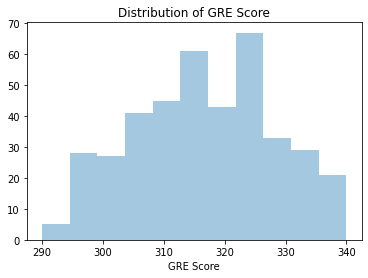

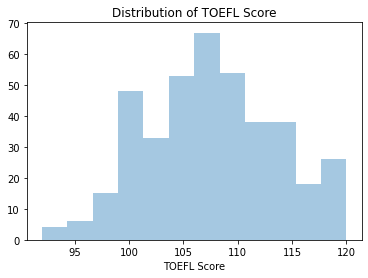

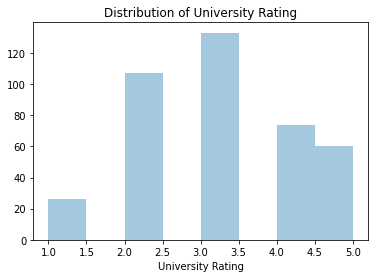

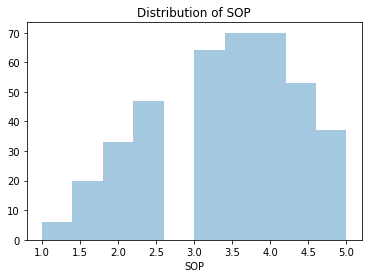

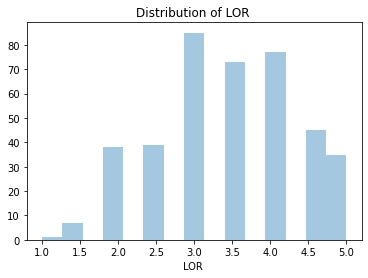

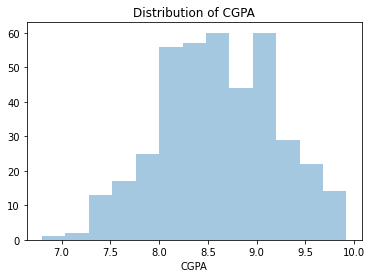

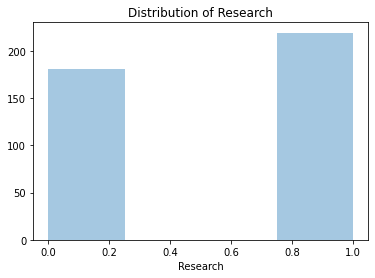

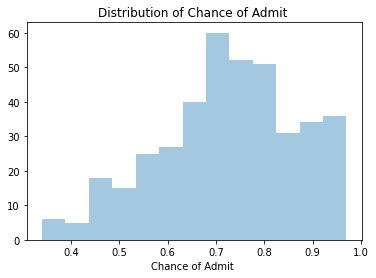

In [29]:
for i in df.columns:
    fig = sns.distplot(df[i], kde=False)
    plt.title('Distribution of '+str(i))
    plt.show()

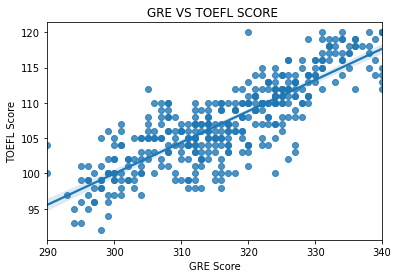

In [30]:
# it is clear from the distribution, students with varied merit apply for the university
# Understanding the relation between the different factors responsible for 
# graduate admissions

fig = sns.regplot(x='GRE Score', y='TOEFL Score', data=df)
plt.title('GRE VS TOEFL SCORE ')
plt.show()

In [31]:
# people with higher GRE scores also have higher TOEFL scores which is justified 
# because both TOEFL & GRE have a verbal section which although not similar are relatable
 

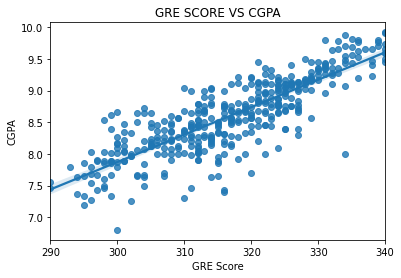

In [32]:
fig = sns.regplot(x='GRE Score', y='CGPA', data=df)
plt.title('GRE SCORE VS CGPA')
plt.show()

In [33]:
# Although there are exceptions, people with higher CGPA usually have higher 
# GRE scores maybe because they are smart or hardworking 



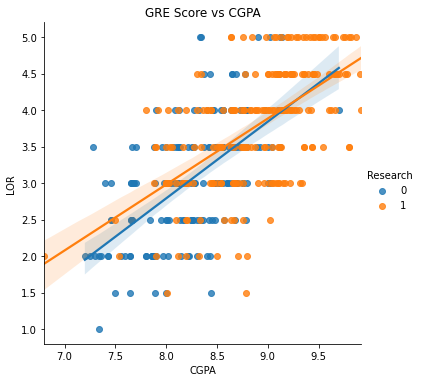

In [34]:
fig = sns.lmplot(x='CGPA', y='LOR ', data=df, hue='Research')
plt.title('GRE Score vs CGPA')
plt.show()

In [35]:
# LORs are not that related with CGPA so it is clear that a person LOR is not 
# dependent on that persons acedemic excellence. Having research experience is 
# usually related with a good LOR which might be justified by the fact that 
# supervisors have personal interaction with the students performing research which 
# usually results in good LORs

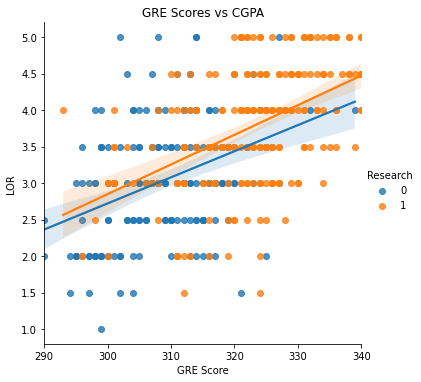

In [36]:
fig = sns.lmplot(x='GRE Score', y='LOR ', data=df, hue="Research")
plt.title("GRE Scores vs CGPA")
plt.show()

In [37]:
# GRE SCORES & LORs are also not that related. People with different kinds or LORs
# have all kinds of GRE scores


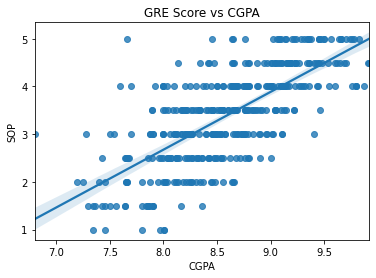

In [38]:
fig = sns.regplot(x="CGPA", y="SOP", data=df)
plt.title('GRE Score vs CGPA')
plt.show()

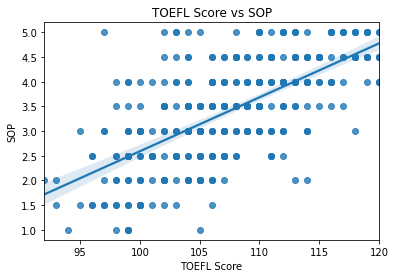

In [39]:
fig = sns.regplot(x='TOEFL Score', y="SOP", data=df)
plt.title("TOEFL Score vs SOP")
plt.show()

In [40]:
# Applicants with different kinds of SOP have different kinds of TOEFL Score. 
# So the quality of SOP is not always related to the applicants English Skills

### CORRELATION AMONG VARIABLES 

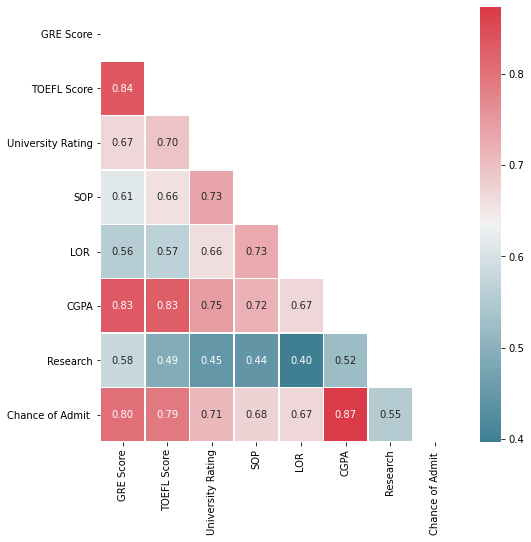

In [41]:
import numpy as np

corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

In [42]:
# lets split the dataset with training and testing set and prepare the inputs and outputs


In [43]:
from sklearn.model_selection import train_test_split

X = df.drop(['Chance of Admit '], axis=1)
y = df['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    shuffle=False)

In [44]:
X_train.shape, X_test.shape

((320, 7), (80, 7))

In [45]:
# Lets use a bunch of different algorithms 

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
!pip3 install catboost
from catboost import CatBoostRegressor
from sklearn.linear_model import Lasso, Ridge, BayesianRidge, ElasticNet, HuberRegressor,LinearRegression, LogisticRegression, SGDRegressor
from sklearn.metrics import mean_squared_error


     |████████████████████████████████| 65.8MB 43kB/s 


In [49]:
models = [['DecisionTree :', DecisionTreeRegressor()],
          ['Linear Regression :', LinearRegression()],
          ['Random Forest :', RandomForestRegressor()],
          ['KNeighbours : ', KNeighborsRegressor(n_neighbors=2)],
          ['SVM: ',SVR()],
          ['AdaBoostClassifier: ', AdaBoostRegressor()],
          ['GradientBoostingClassifier: ', GradientBoostingRegressor()],
          ['Xgboost :', XGBRegressor()],
          ['CatBoost :', CatBoostRegressor(logging_level='Silent')],
          ['Lasso: ', Lasso()],
          ['Ridge: ', Ridge()],
          ['BayesianRidge: ', BayesianRidge()],
          ['ElasticNet : ', ElasticNet()],
          ['Huber Regressor: ', HuberRegressor()]]


print("Results..................")

Results..................


In [51]:
for name, model in models:
    model = model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))
    print('\n\n')

DecisionTree : 0.09165833295451103



Linear Regression : 0.06473311695782082



Random Forest : 0.07110892788532253



KNeighbours :  0.083342291185208



SVM:  0.08180727044650482



AdaBoostClassifier:  0.08296196343127481



GradientBoostingClassifier:  0.06650700589366758



[05:33:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Xgboost : 0.0681331805795245



CatBoost : 0.07153086676897127



Lasso:  0.13137657075960432



Ridge:  0.06479970981992439



BayesianRidge:  0.06489639576721208



ElasticNet :  0.0980598738822262



Huber Regressor:  0.0688492948627345





In [52]:
# Generate Feature Importance 

classifier = RandomForestRegressor()
classifier.fit(X, y)
feature_names = X.columns
importance_frame = pd.DataFrame()
importance_frame['Features'] = X.columns
importance_frame['Importance'] = classifier.feature_importances_
importance_frame = importance_frame.sort_values(by=['Importance'], ascending=True)

#### Visualize Feature Importances 

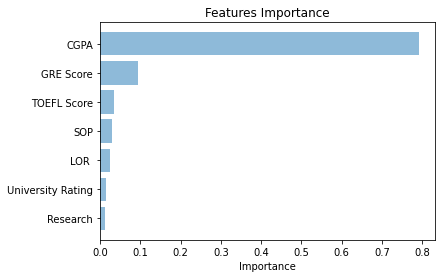

In [56]:
plt.barh([1,2,3,4,5,6,7], importance_frame['Importance'], align='center',
         alpha=0.5)
plt.yticks([1,2,3,4,5,6,7], importance_frame['Features'])
plt.xlabel('Importance')
plt.title('Features Importance')
plt.show()
